In [2]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime as datetime
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

print("Python Version:", sys.version)

Python Version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


## Import datasets 
#### Explore the shape of merged datasets and decide which one to use for analysis.

In [3]:
"""
This was done to analyze the different datasets.
The imdb_mojo dataset was prepared and chosen for further analysis
"""
#Read the four available datasets and rename columns. 
data_bxoff = pd.read_pickle('Misc Files/box_office.pkl')
data_topdoc = pd.read_pickle('Misc Files/top_doc.pkl')
data_imdb = pd.read_csv('Misc Files/IMDB_byVote.csv')
data_mojo = pd.read_pickle('Misc Files/mojo.pkl')
data_bxoff.rename(columns={'Rank':'Rank_BX', 'Year':'Year', 
                          'Title':'Title', 'Worldwide Box Office':'Worldwide_Box_Office_BX',
                          'Domestic Box Office':'Domestic_Box_Office_BX', 
                          'International Box Office':'International_Box_Office_BX'}, inplace = True)
data_topdoc.rename(columns = {'Title':'Title', 'User_Rating_Top_Doc':'User Rating_TD', 'Years':'Year_TD',
                              'Category':'Category'}, inplace = True)
data_imdb.rename(columns ={'Title':'Title', 'User Rating_IMDB':'User_Rating_IMDB', 'Metacritic':'Metacritic',
                               'Number of Votes_IMDB':'Number_of_votes_IMDB', 'Running Time':'Running_Time', 
                               'Release Date_IMDB':'Release_Date_IMDB', 'Director':'Director'}, inplace = True)
data_mojo.rename(columns = {'Mojo Rank':'Rank_MOJO_by_Box_office', 'Title':'Title', 'Lifetime Gross':'Lifetime_Gross_MOJO',
                            'Max Theaters':'Max_Theaters', 'Opening':'Opening_Box', 'Opening Th':'Opening_Th', 'Release Date':'Release_Date',
                            'Distributor':'Distributor'}, inplace = True)

#Drop uncessary columns
data_imdb.drop('Unnamed: 0', axis = 1, inplace = True)
#Strip uncessary characters in distributor column
data_mojo = data_mojo.apply(lambda x: x.str.strip('\n \n') if x.dtype == "object" else x)

#Examine the shape of the datasets
print('The shape of the IMDB data is: {}.'.format(data_imdb.shape))
print('The shape of Box Office Mojo data is: {}'.format(data_mojo.shape))
print('The shape of Top Documentary data is: {}.'.format(data_topdoc.shape))
print('The shape of the-numbers box office data is: {}'.format(data_bxoff.shape))

#Datasets were merged with IMDB dataset on title
#Merging on titles caused the dataset to become smaller
#IMDB merged with Box Office Mojo data gave the largest dataset to work with, 715 rows.
imdb_topdoc = pd.merge(data_topdoc, data_imdb, on=['Title'])
imdb_bxoff = pd.merge(data_bxoff, data_imdb, on=['Title'])
imdb_mojo = pd.merge(data_mojo, data_imdb, on=['Title'])

print('The shape of IMDB - Box Office Mojo data is: {}'.format(imdb_mojo.shape))
print('The shape of IMDB - Top Documentary data is: {}.'.format(imdb_topdoc.shape))
print('The shape of IMDB - the-numbers box office data is: {}'.format(imdb_bxoff.shape))

The shape of the IMDB data is: (2000, 7).
The shape of Box Office Mojo data is: (2075, 8)
The shape of Top Documentary data is: (2549, 4).
The shape of the-numbers box office data is: (1211, 6)
The shape of IMDB - Box Office Mojo data is: (715, 14)
The shape of IMDB - Top Documentary data is: (172, 10).
The shape of IMDB - the-numbers box office data is: (422, 12)


#### Use IMDB - Box Office Mojo dataset. It has the most number of rows and provides the most data.

In [4]:
#Save IMDB_mojo merged dataset as CSV 
#imdb_mojo.to_csv('imdb_mojo.csv')
# imdb_mojo= pd.read_csv('imdb_mojo.csv')

In [6]:
print('The shape of IMDB merged with Box Office Mojo data is: {}'.format(imdb_mojo.shape))

The shape of IMDB merged with Box Office Mojo data is: (715, 14)


## Clean the dataset
#### Use the merged data set containing IMDB and Box Office Mojo data

In [7]:
#Clean data by removing '$',',', and '-'. 
#Convert values from string to numeric
imdb_mojo['Lifetime_Gross_MOJO'] = imdb_mojo['Lifetime_Gross_MOJO'].replace({'\$':''}, regex = True)
imdb_mojo['Lifetime_Gross_MOJO'] = imdb_mojo['Lifetime_Gross_MOJO'].replace({',':''}, regex = True)
imdb_mojo['Lifetime_Gross_MOJO'] = imdb_mojo['Lifetime_Gross_MOJO'].replace({'-':''}, regex = True)
imdb_mojo['Lifetime_Gross_MOJO'] = pd.to_numeric(imdb_mojo['Lifetime_Gross_MOJO'])

imdb_mojo['Opening_Box'] = imdb_mojo['Opening_Box'].replace({'\$':''}, regex = True)
imdb_mojo['Opening_Box'] = imdb_mojo['Opening_Box'].replace({',':''}, regex = True)
imdb_mojo['Opening_Box'] = imdb_mojo['Opening_Box'].replace({'-':''}, regex = True)
imdb_mojo['Opening_Box'] = pd.to_numeric(imdb_mojo['Opening_Box'])

imdb_mojo['Number_of_votes_IMDB'] = imdb_mojo['Number_of_votes_IMDB'].replace({',':''}, regex = True)
imdb_mojo['Number_of_votes_IMDB'] = pd.to_numeric(imdb_mojo['Number_of_votes_IMDB'])

imdb_mojo['Rank_MOJO_by_Box_office'] = imdb_mojo['Rank_MOJO_by_Box_office'].replace({',':''}, regex = True)
imdb_mojo['Rank_MOJO_by_Box_office'] = pd.to_numeric(imdb_mojo['Rank_MOJO_by_Box_office'])

imdb_mojo['Max_Theaters'] = imdb_mojo['Max_Theaters'].replace({',':''}, regex = True)
imdb_mojo['Max_Theaters'] = imdb_mojo['Max_Theaters'].replace({'-':''}, regex = True)
imdb_mojo['Max_Theaters'] = pd.to_numeric(imdb_mojo['Max_Theaters'])

imdb_mojo['Opening_Th'] = imdb_mojo['Opening_Th'].replace({'-':''}, regex = True)
imdb_mojo['Opening_Th'] = imdb_mojo['Opening_Th'].replace({',':''}, regex = True)
imdb_mojo['Opening_Th'] = pd.to_numeric(imdb_mojo['Opening_Th'])

imdb_mojo['User_Rating_IMDB'] = pd.to_numeric(imdb_mojo['User_Rating_IMDB'])
imdb_mojo['Metacritic'] = pd.to_numeric(imdb_mojo['Metacritic'])



In [8]:
#Both IMDB and Box Office Mojo datasets had release date, drop one of them
imdb_mojo.drop(['Release_Date_IMDB',], inplace = True, axis = 1)

In [9]:
#Convert to datetime
#Use time delta to find difference between the select documentary and the oldest documentary in the list
imdb_mojo['Release_Date'] = pd.to_datetime(imdb_mojo['Release_Date']) 
imdb_mojo['Release_Difference'] = (imdb_mojo['Release_Date']-imdb_mojo['Release_Date'].min())/np.timedelta64(1,'D')
imdb_mojo.drop(['Release_Date'], inplace = True, axis = 1)

In [10]:
imdb_mojo.to_csv('cleaned_imdb_mojo.csv')

In [ ]:
#filter out rows without a metacritic score
#has_metacritic_df = imdb_mojo[imdb_mojo.Metacritic.notnull()]

In [11]:
#Drop Nas in imdb_mojo dataframe to eliminate rows without a metacritic score
imdb_mojo_drop_na = imdb_mojo.dropna()
#possible try MICE?

## Exploratory Data Analysis

In [14]:
#Check the dataset containing Metacritic values that are N/A.
no_metacritic_df = imdb_mojo[imdb_mojo.Metacritic.isnull()]

In [15]:
no_metacritic_df.shape

(169, 13)

In [16]:
#There are 715 films and 149 distributors, with 353 titles made by 15 companies. Make 15 dummmy variables.
#Categorize distributors that are not in the top 15 as 'other'.
distributor_counts = imdb_mojo_drop_na['Distributor'].value_counts()
distributor_counts.head(50)

Magnolia Pictures                      52
IFC Films                              49
Sony Pictures Classics                 33
-                                      21
THINKFilm                              16
Abramorama                             15
First Run                              14
Zeitgeist Films                        13
Oscilloscope                           13
Lionsgate                              10
Strand Releasing                        9
Kino Lorber                             9
Roadside Attractions                    9
Music Box Films                         9
Drafthouse Films                        9
RADiUS-TWC                              8
Palm Pictures                           7
Miramax                                 6
FilmRise                                6
The Cinema Guild                        6
PBS Distribution                        6
Greenwich Entertainment                 6
Walt Disney Studios Motion Pictures     6
The Orchard                       

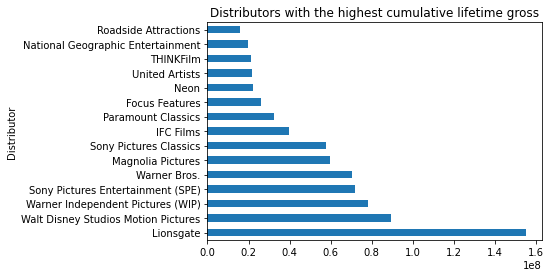

In [17]:
#identify the distributors that has the highest cumulative lifetime gross
df_distributor = imdb_mojo_drop_na.groupby(['Distributor'])['Lifetime_Gross_MOJO'].sum()
distributor_sorted = df_distributor.sort_values(ascending = False)
distributor_sorted = distributor_sorted.head(15)
bar_plot = distributor_sorted.plot(kind = 'barh', title = 'Distributors with the highest cumulative lifetime gross')
#caveat = accumulation of the films, did not take an average with number of films produced

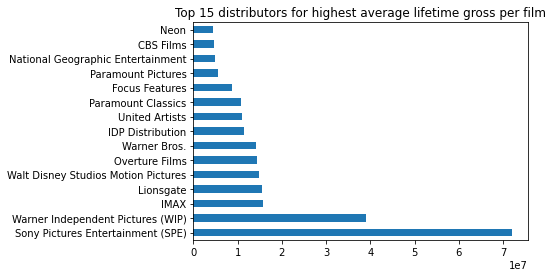

In [18]:
#identify the distributors that make the average highest grossing films.
distributor_gross_average = (imdb_mojo_drop_na.groupby(['Distributor'])['Lifetime_Gross_MOJO'].sum())/(imdb_mojo_drop_na['Distributor'].value_counts())
distributor_gross_average = distributor_gross_average.sort_values(ascending = False)
top_distributor_gross_average = distributor_gross_average.head(15)
bar_plot = top_distributor_gross_average.plot(kind = 'barh', title = 'Top 15 distributors for highest average lifetime gross per film')



In [19]:
top_distributor_list = list(top_distributor_gross_average.index)
def distributor(x):
    if x in top_distributor_list:
        return(x)
    if x not in top_distributor_list:
        return('Other')
imdb_mojo_drop_na['Distributor'] = imdb_mojo_drop_na['Distributor'].apply(distributor)
imdb_mojo_drop_na.drop(['Running_Time', 'Director'], inplace = True, axis = 1)
df1 = pd.get_dummies(imdb_mojo_drop_na['Distributor'])
imdb_mojo_drop_na = pd.concat([imdb_mojo_drop_na, df1], axis=1)
imdb_mojo_drop_na.drop(['Distributor'], inplace = True, axis = 1)
imdb_mojo_drop_na

<ipython-input-19-9b5ab1f54fa5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_mojo_drop_na['Distributor'] = imdb_mojo_drop_na['Distributor'].apply(distributor)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Rank_MOJO_by_Box_office,Title,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,1,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,7.5,67.0,125629,8475.0,...,0,0,0,0,0,0,0,0,0,0
1,2,March of the Penguins,77437223,2506.0,137492.0,4.0,7.5,79.0,55375,8841.0,...,0,0,0,0,0,0,0,0,0,1
3,4,This Is It,72091016,3481.0,23234394.0,3481.0,7.2,67.0,38161,10428.0,...,0,0,0,0,0,1,0,0,0,0
4,5,Under the Sea 3D,36262926,108.0,661185.0,49.0,7.5,77.0,1730,10171.0,...,0,0,0,0,0,0,0,0,1,0
6,7,Earth,32011576,1804.0,8825760.0,1804.0,8.0,72.0,14137,10239.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1972,Knuckle,2647,3.0,2647.0,3.0,6.8,65.0,2693,11200.0,...,0,1,0,0,0,0,0,0,0,0
710,1986,You're Gonna Miss Me,2324,1.0,1340.0,1.0,7.6,64.0,988,9555.0,...,0,1,0,0,0,0,0,0,0,0
711,1991,Workingman's Death,2214,2.0,2214.0,2.0,8.0,67.0,1647,9086.0,...,0,1,0,0,0,0,0,0,0,0
712,1998,"Accidental Courtesy: Daryl Davis, Race & America",1940,1.0,1452.0,1.0,7.7,63.0,1019,13055.0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
imdb_mojo_drop_na.columns

Index(['Rank_MOJO_by_Box_office', 'Title', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
       'Metacritic', 'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
       'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)'],
      dtype='object')

In [22]:
imdb_mojo_drop_na.corr()

,Rank_MOJO_by_Box_office,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,CBS Films,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
Rank_MOJO_by_Box_office,1.000000,-0.279574,-0.328757,-0.155764,-0.180661,-0.172836,-0.182006,-0.348604,0.171365,-0.050771,...,-0.086769,0.282828,-0.053916,-0.073029,-0.071551,-0.055894,-0.047061,-0.102029,-0.081282,-0.062137
Lifetime_Gross_MOJO,-0.279574,1.000000,0.777038,0.788736,0.501631,0.071493,-0.015944,0.539745,-0.089704,0.014913,...,0.031351,-0.472896,0.069409,0.086522,0.029072,0.391633,0.071011,0.178283,0.152761,0.293488
Max_Theaters,-0.328757,0.777038,1.000000,0.740415,0.844501,0.026680,-0.068116,0.362793,0.003992,0.028705,...,0.040535,-0.521451,0.133839,0.072524,0.123151,0.503516,0.009481,0.492896,0.044941,0.255450
Opening_Box,-0.155764,0.788736,0.740415,1.000000,0.759249,0.008316,-0.089860,0.324137,-0.037099,-0.001901,...,-0.007677,-0.325340,0.000544,-0.002974,0.085275,0.640162,-0.003765,0.287725,0.014113,-0.004457
Opening_Th,-0.180661,0.501631,0.844501,0.759249,1.000000,-0.023524,-0.111794,0.118133,0.033117,-0.003921,...,-0.012472,-0.375105,-0.006587,0.022813,0.090960,0.611544,-0.008947,0.607455,0.032142,-0.009325
User_Rating_IMDB,-0.172836,0.071493,0.026680,0.008316,-0.023524,1.000000,0.452419,0.256558,-0.204099,0.007750,...,0.021341,-0.023412,-0.001040,-0.032311,-0.032578,-0.018619,-0.001472,0.015468,-0.010226,-0.001472
Metacritic,-0.182006,-0.015944,-0.068116,-0.089860,-0.111794,0.452419,1.000000,0.171673,-0.072821,-0.048553,...,0.082172,0.069574,-0.076566,-0.045366,-0.060799,-0.042950,-0.037006,-0.082729,-0.043589,-0.029075
Number_of_votes_IMDB,-0.348604,0.539745,0.362793,0.324137,0.118133,0.256558,0.171673,1.000000,-0.147302,-0.015914,...,0.012797,-0.305879,0.102914,0.116506,0.002791,0.094541,0.282797,-0.014353,-0.006907,0.100117
Release_Difference,0.171365,-0.089704,0.003992,-0.037099,0.033117,-0.204099,-0.072821,-0.147302,1.000000,0.061519,...,0.126168,0.067882,-0.012756,-0.102028,-0.007302,-0.012022,-0.082790,0.035654,-0.038879,-0.052471
CBS Films,-0.050771,0.014913,0.028705,-0.001901,-0.003921,0.007750,-0.048553,-0.015914,0.061519,1.000000,...,-0.004292,-0.139303,-0.001912,-0.003318,-0.002707,-0.001912,-0.002707,-0.004706,-0.004292,-0.002707


In [23]:
imdb_mojo_drop_na.describe()

,Rank_MOJO_by_Box_office,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,CBS Films,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
count,524.000000,5.240000e+02,524.000000,5.240000e+02,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,...,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,625.898855,1.928524e+06,94.961832,2.124096e+05,41.053435,7.411832,74.666031,7585.780534,11001.643130,0.001908,...,0.009542,0.910305,0.001908,0.005725,0.003817,0.001908,0.003817,0.011450,0.009542,0.003817
std,486.990335,7.841339e+06,294.335357,1.574043e+06,246.200095,0.497963,7.812154,14155.125795,2088.423576,0.043685,...,0.097309,0.286017,0.043685,0.075520,0.061721,0.043685,0.061721,0.106494,0.097309,0.061721
min,1.000000,1.294000e+03,1.000000,3.190000e+02,1.000000,5.300000,61.000000,912.000000,2695.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.500000,7.195525e+04,8.000000,8.558500e+03,1.000000,7.100000,69.000000,1468.000000,9602.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,515.500000,2.423195e+05,19.000000,1.840900e+04,2.000000,7.400000,74.000000,3042.500000,11420.500000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,912.250000,9.471290e+05,65.000000,4.561100e+04,5.000000,7.700000,80.000000,6873.500000,12572.250000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2027.000000,1.191948e+08,3481.000000,2.392064e+07,3481.000000,8.600000,99.000000,138833.000000,14119.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


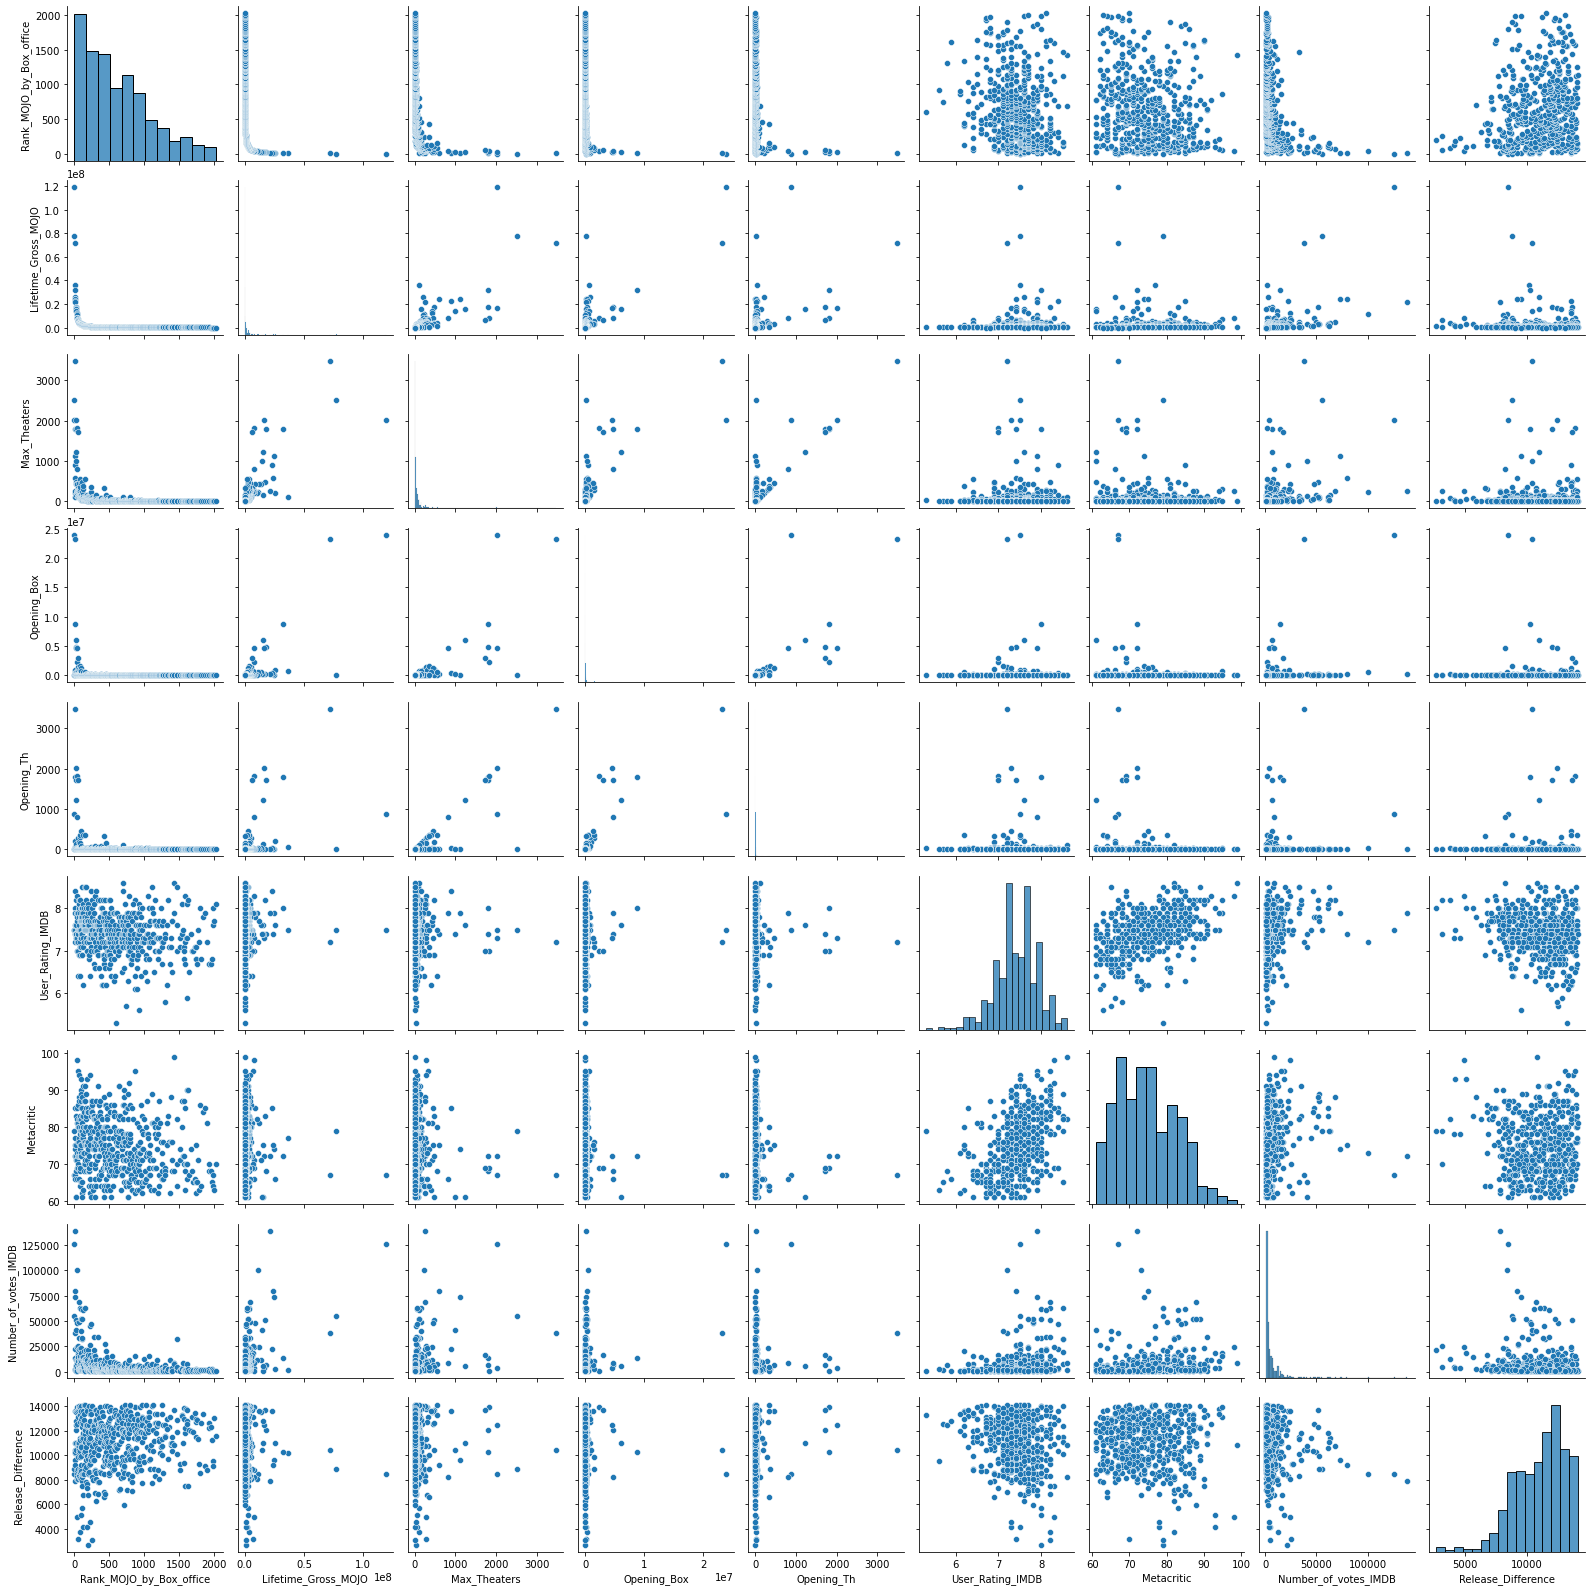

In [26]:
#Plot a pairplot to look at the relationship between numerical variables
smaller_df = imdb_mojo_drop_na.loc[:, ['Rank_MOJO_by_Box_office', 'Title', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
       'Metacritic', 'Number_of_votes_IMDB', 'Release_Difference']]
sns.pairplot(smaller_df, kind = 'scatter')

In [25]:
#imdb_mojo_drop_na.to_csv('imdb_mojo_for_model.csv')